In [6]:
import numpy as np 
import matplotlib.pyplot as plt 

In [1]:
def lderivative(f, x, eps=1e-6):
    return (f(x)-f(x-eps))/eps
def rderivative(f, x, eps=1e-6):
    return (f(x+eps)-f(x))/eps
def derivative(f, x, eps=1e-6):
    return 0.5*(f(x+eps)-f(x-eps))/eps

In [21]:
x = np.linspace(0,100,10000)

In [22]:
f = lambda x: x**2

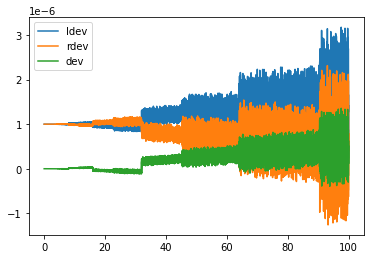

In [28]:
plt.plot(x, 2*x - lderivative(f,x), label="ldev")
plt.plot(x, -2*x + rderivative(f,x), label="rdev")
plt.plot(x, 2*x - derivative(f,x, 1e-6), label="dev")
plt.legend()
plt.show()

In [29]:
( 2*x - derivative(f,x, 1e-6)).mean()

2.1879380774151962e-07

In [4]:
lderivative(f, 2), rderivative(f, 2), derivative(f, 2)

(3.999998999582033, 4.0000010006480125, 4.000000000115023)

In [28]:
class polynomial:
    def __init__(self, coeff):
        self.coeff = [c for c in coeff]
        self.degree = len(coeff) -1
    def __call__(self, x):
        ans = self.coeff[0]
        for c in self.coeff[1:]:
            ans = ans*x + c
        return ans
    def derivative(self):
        coeff = [(self.degree - r)*c for r, c in enumerate(self.coeff[:-1])]
        return polynomial(coeff)
    def __repr__(self):
        n = self.degree
        return ' + '.join([f'{c}x^{n-r}' for r, c in enumerate(self.coeff) if c!= 0])
    def newton(self, x0, iteration=1):
        x=[x0]
        obj = self.derivative()
        for i in range(iteration):
            x.append(x[i] - self(x[i])/obj(x[i]))
        return x

In [29]:
p = polynomial([1,0,0,1,0])

In [30]:
p

1x^4 + 1x^1

In [32]:
p.newton(1,9)

[1,
 0.6,
 0.20858369098712448,
 0.005479707099794534,
 2.7048946190516565e-09,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [4]:
p(5)

25